# **I-GOOGLE ACCOUNT AUTHENTIFICATION**

In [1]:
from google.colab import auth
auth.authenticate_user()


# **II-IMPORT THE REQUIREMENTS LIBRARIES**

In [2]:
! pip install -q -U zarr xarray gcsfs
import xarray as xr
import gcsfs
import zarr
import pandas as pd
import matplotlib.pyplot as plt


In [3]:

# define the neuralgcm path data
ngcm_path = 'gs://neuralgcm/amip_runs/v1_precip_stochastic_2_8_deg/2001-to-2021_128x64_gauss_37-level_stride3h.zarr'
#load the data
ngcm_data = xr.open_zarr(ngcm_path,chunks={"time":100})

/tmp/ipython-input-89403667.py:4: FutureWarning: In a future version, xarray will not decode the variable 'prediction_timedelta' into a timedelta64 dtype based on the presence of a timedelta-like 'units' attribute by default. Instead it will rely on the presence of a timedelta64 'dtype' attribute, which is now xarray's default way of encoding timedelta64 values.
To continue decoding into a timedelta64 dtype, either set `decode_timedelta=True` when opening this dataset, or add the attribute `dtype='timedelta64[ns]'` to this variable on disk.
To opt-in to future behavior, set `decode_timedelta=False`.
  ngcm_data = xr.open_zarr(ngcm_path,chunks={"time":100})


In [4]:
#the size of the neural gcm data
ngcm_data.nbytes/1e9

1628.740724872

In [5]:
# ngcm_data.chunks

In [6]:
ngcm_data.data_vars

Data variables:
    evaporation                          (time, prediction_timedelta, surface, longitude, latitude) float32 71GB dask.array<chunksize=(37, 8, 1, 128, 64), meta=np.ndarray>
    geopotential                         (time, prediction_timedelta, level, longitude, latitude) float32 212GB dask.array<chunksize=(37, 8, 3, 128, 64), meta=np.ndarray>
    precipitation_cumulative_mean        (time, prediction_timedelta, surface, longitude, latitude) float32 71GB dask.array<chunksize=(37, 8, 1, 128, 64), meta=np.ndarray>
    specific_cloud_ice_water_content     (time, prediction_timedelta, level, longitude, latitude) float32 212GB dask.array<chunksize=(37, 8, 3, 128, 64), meta=np.ndarray>
    specific_cloud_liquid_water_content  (time, prediction_timedelta, level, longitude, latitude) float32 212GB dask.array<chunksize=(37, 8, 3, 128, 64), meta=np.ndarray>
    specific_humidity                    (time, prediction_timedelta, level, longitude, latitude) float32 212GB dask.array<chun

In [7]:
# #the min and the max values of time in the global neural GCM
# print(f"the min date is :",ngcm_data.time.min().values)
# print(f"the max date is :",ngcm_data.time.max().values)

# **neuralGCM data for our domain**

In [8]:
ngcm_data.latitude.values

array([-87.86379884, -85.09652699, -82.31291295, -79.52560657,
       -76.73689968, -73.94751515, -71.15775201, -68.36775611,
       -65.57760701, -62.7873518 , -59.99702011, -57.20663153,
       -54.41619953, -51.62573367, -48.83524097, -46.04472663,
       -43.25419467, -40.46364818, -37.67308963, -34.88252099,
       -32.09194388, -29.30135962, -26.51076933, -23.72017393,
       -20.92957425, -18.13897099, -15.34836476, -12.55775612,
        -9.76714556,  -6.97653355,  -4.18592053,  -1.39530691,
         1.39530691,   4.18592053,   6.97653355,   9.76714556,
        12.55775612,  15.34836476,  18.13897099,  20.92957425,
        23.72017393,  26.51076933,  29.30135962,  32.09194388,
        34.88252099,  37.67308963,  40.46364818,  43.25419467,
        46.04472663,  48.83524097,  51.62573367,  54.41619953,
        57.20663153,  59.99702011,  62.7873518 ,  65.57760701,
        68.36775611,  71.15775201,  73.94751515,  76.73689968,
        79.52560657,  82.31291295,  85.09652699,  87.86

In [9]:
ngcm_data.longitude.values

array([  0.    ,   2.8125,   5.625 ,   8.4375,  11.25  ,  14.0625,
        16.875 ,  19.6875,  22.5   ,  25.3125,  28.125 ,  30.9375,
        33.75  ,  36.5625,  39.375 ,  42.1875,  45.    ,  47.8125,
        50.625 ,  53.4375,  56.25  ,  59.0625,  61.875 ,  64.6875,
        67.5   ,  70.3125,  73.125 ,  75.9375,  78.75  ,  81.5625,
        84.375 ,  87.1875,  90.    ,  92.8125,  95.625 ,  98.4375,
       101.25  , 104.0625, 106.875 , 109.6875, 112.5   , 115.3125,
       118.125 , 120.9375, 123.75  , 126.5625, 129.375 , 132.1875,
       135.    , 137.8125, 140.625 , 143.4375, 146.25  , 149.0625,
       151.875 , 154.6875, 157.5   , 160.3125, 163.125 , 165.9375,
       168.75  , 171.5625, 174.375 , 177.1875, 180.    , 182.8125,
       185.625 , 188.4375, 191.25  , 194.0625, 196.875 , 199.6875,
       202.5   , 205.3125, 208.125 , 210.9375, 213.75  , 216.5625,
       219.375 , 222.1875, 225.    , 227.8125, 230.625 , 233.4375,
       236.25  , 239.0625, 241.875 , 244.6875, 247.5   , 250.3

In [10]:
#select Horn Africa data
ngcm_data_africa = ngcm_data.sel(latitude=slice(-20,30),longitude=slice(15,60))


In [11]:
#the prediction time
ngcm_data_africa.prediction_timedelta.indexes

Indexes:
    prediction_timedelta  TimedeltaIndex([   '0 days 00:00:00',    '0 days 03:00:00',
                   '0 days 06:00:00',    '0 days 09:00:00',
                   '0 days 12:00:00',    '0 days 15:00:00',
                   '0 days 18:00:00',    '0 days 21:00:00',
                   '1 days 00:00:00',    '1 days 03:00:00',
                ...
                '7299 days 18:00:00', '7299 days 21:00:00',
                '7300 days 00:00:00', '7300 days 03:00:00',
                '7300 days 06:00:00', '7300 days 09:00:00',
                '7300 days 12:00:00', '7300 days 15:00:00',
                '7300 days 18:00:00', '7300 days 21:00:00'],
               dtype='timedelta64[ns]', name='prediction_timedelta', length=58408, freq=None)

# we can quicly notice that the slice of the data is the rigth slice

In [12]:
ngcm_data_africa.nbytes/1e9

57.26086748

In [13]:
ngcm_data_africa.info()

xarray.Dataset {
dimensions:
	time = 37 ;
	prediction_timedelta = 58408 ;
	surface = 1 ;
	longitude = 16 ;
	latitude = 18 ;
	level = 3 ;

variables:
	float32 evaporation(time, prediction_timedelta, surface, longitude, latitude) ;
	float32 geopotential(time, prediction_timedelta, level, longitude, latitude) ;
	float32 precipitation_cumulative_mean(time, prediction_timedelta, surface, longitude, latitude) ;
	float32 specific_cloud_ice_water_content(time, prediction_timedelta, level, longitude, latitude) ;
	float32 specific_cloud_liquid_water_content(time, prediction_timedelta, level, longitude, latitude) ;
	float32 specific_humidity(time, prediction_timedelta, level, longitude, latitude) ;
	float32 temperature(time, prediction_timedelta, level, longitude, latitude) ;
	float32 u_component_of_wind(time, prediction_timedelta, level, longitude, latitude) ;
	float32 v_component_of_wind(time, prediction_timedelta, level, longitude, latitude) ;
	float64 latitude(latitude) ;
	int64 level(level) 

In [14]:
# ## find the minimmum time and date present in the Neural GCM data for Horn Africa
# ngcm_data_africa.time.min()
# # find the maximum time and date present in the Neural GCM data or Horn Africa
# # ngcm_data_africa.time.max()

In [15]:
ngcm_data_africa.prediction_timedelta
# ou
# selected_data["year"]


<xarray.DataArray 'prediction_timedelta' (prediction_timedelta: 58408)> Size: 467kB
array([                 0,     10800000000000,     21600000000000, ...,
       630774000000000000, 630784800000000000, 630795600000000000],
      dtype='timedelta64[ns]')
Coordinates:
  * prediction_timedelta  (prediction_timedelta) timedelta64[ns] 467kB 00:00:...

In [16]:
#the prediction time for Horn Africa
print(f"the min prediction date is :",ngcm_data_africa.prediction_timedelta.min().values)

print(f"the max prediction date is :",ngcm_data_africa.prediction_timedelta.max().values)


the min prediction date is : 0 nanoseconds
the max prediction date is : 630795600000000000 nanoseconds


In [17]:
ngcm_data_africa.prediction_timedelta.values

array([                 0,     10800000000000,     21600000000000, ...,
       630774000000000000, 630784800000000000, 630795600000000000],
      dtype='timedelta64[ns]')

In [18]:
#select the climate timeset where prediction_timedelta is a multiple of 6h

# Convert prediction_timedelta to a pandas Series for easier manipulation
prediction_timedelta_series = pd.Series(ngcm_data_africa.prediction_timedelta.values)

# Select values where prediction_timedelta is a multiple of 6 hours (in seconds)
selected_indices = prediction_timedelta_series[prediction_timedelta_series % pd.Timedelta(hours=6) == pd.Timedelta(0)].index

# Use the selected indices to filter the entire dataset
selected_data = ngcm_data_africa.isel(prediction_timedelta=selected_indices)

selected_data

<xarray.Dataset> Size: 29GB
Dimensions:                              (time: 37,
                                          prediction_timedelta: 29204,
                                          surface: 1, longitude: 16,
                                          latitude: 18, level: 3)
Coordinates:
  * time                                 (time) datetime64[ns] 296B 2001-01-0...
  * prediction_timedelta                 (prediction_timedelta) timedelta64[ns] 234kB ...
  * surface                              (surface) int64 8B 1
  * longitude                            (longitude) float64 128B 16.88 ... 5...
  * latitude                             (latitude) float64 144B -18.14 ... 29.3
  * level                                (level) int64 24B 500 700 850
Data variables:
    evaporation                          (time, prediction_timedelta, surface, longitude, latitude) float32 1GB dask.array<chunksize=(37, 8, 1, 16, 18), meta=np.ndarray>
    geopotential                         (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(37, 8, 3, 16, 18), meta=np.ndarray>
    precipitation_cumulative_mean        (time, prediction_timedelta, surface, longitude, latitude) float32 1GB dask.array<chunksize=(37, 8, 1, 16, 18), meta=np.ndarray>
    specific_cloud_ice_water_content     (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(37, 8, 3, 16, 18), meta=np.ndarray>
    specific_cloud_liquid_water_content  (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(37, 8, 3, 16, 18), meta=np.ndarray>
    specific_humidity                    (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(37, 8, 3, 16, 18), meta=np.ndarray>
    temperature                          (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(37, 8, 3, 16, 18), meta=np.ndarray>
    u_component_of_wind                  (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(37, 8, 3, 16, 18), meta=np.ndarray>
    v_component_of_wind                  (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(37, 8, 3, 16, 18), meta=np.ndarray>
Attributes:
    experiment_id:  121052169
    worker_id:      2

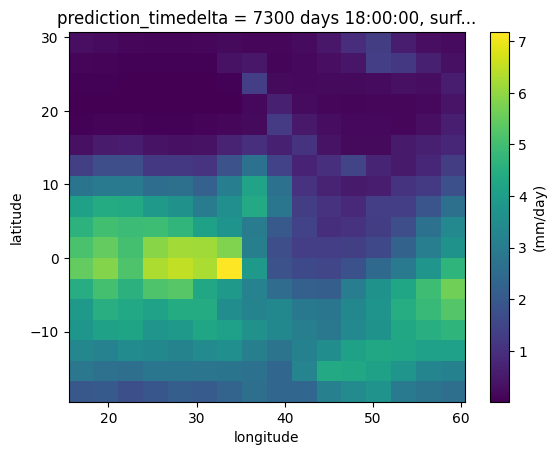

In [19]:
# Calculate mean precipitation
m_to_mm = 1000
measurement_freq = 6  # in hours
measurements_in_a_day = 24 / measurement_freq
daily_precip = selected_data.precipitation_cumulative_mean.isel(
    time=-1, surface=0, prediction_timedelta=-1
) * (
    m_to_mm
    * measurements_in_a_day
    / (len(selected_data.prediction_timedelta) - 1)
)
daily_precip.plot(x="longitude", cbar_kwargs={"label": "(mm/day)"})

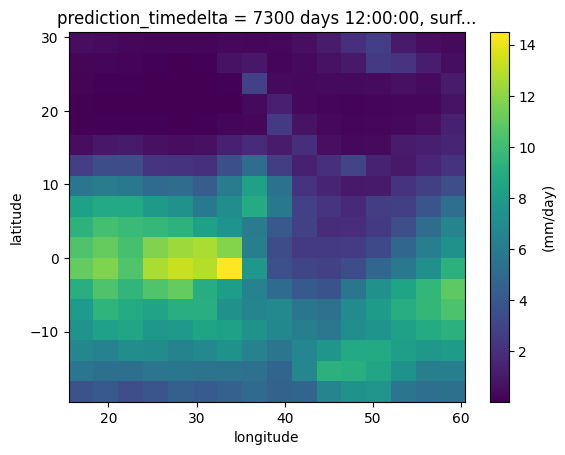

In [ ]:
# Calculate mean precipitation
m_to_mm = 1000
measurement_freq = 3  # in hours
measurements_in_a_day = 24 / measurement_freq
daily_precip = selected_data.precipitation_cumulative_mean.isel(
    time=-2, surface=0, prediction_timedelta=-2
) * (
    m_to_mm
    * measurements_in_a_day
    / (len(selected_data.prediction_timedelta) - 1)
)
daily_precip.plot(x="longitude", cbar_kwargs={"label": "(mm/day)"})

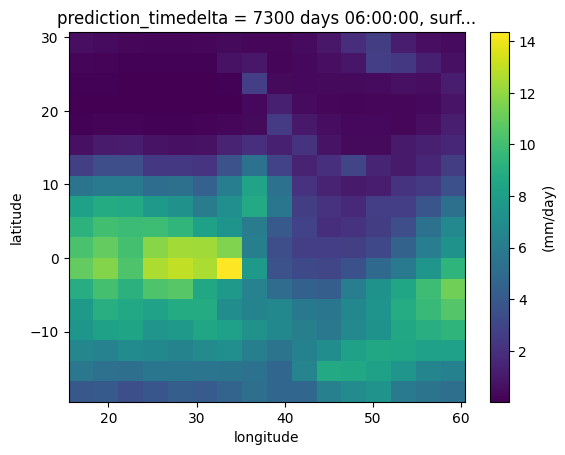

In [ ]:
# Calculate mean precipitation
m_to_mm = 1000
measurement_freq = 3  # in hours
measurements_in_a_day = 24 / measurement_freq
daily_precip = selected_data.precipitation_cumulative_mean.isel(
    time=-1, surface=0, prediction_timedelta=-3
) * (
    m_to_mm
    * measurements_in_a_day
    / (len(selected_data.prediction_timedelta) - 1)
)
daily_precip.plot(x="longitude", cbar_kwargs={"label": "(mm/day)"})

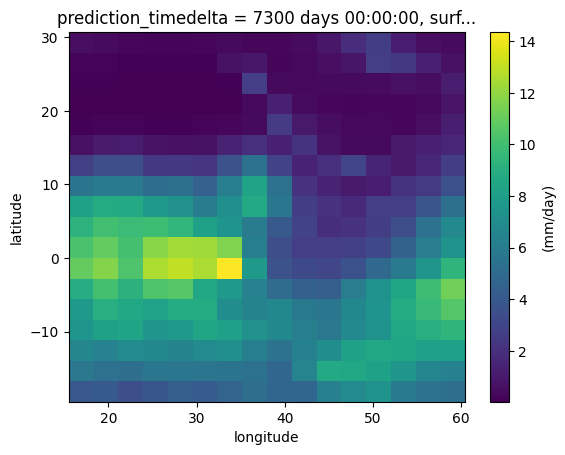

In [ ]:
# Calculate mean precipitation
m_to_mm = 1000
measurement_freq = 3  # in hours
measurements_in_a_day = 24 / measurement_freq
daily_precip = selected_data.precipitation_cumulative_mean.isel(
    time=-1, surface=0, prediction_timedelta=-4
) * (
    m_to_mm
    * measurements_in_a_day
    / (len(selected_data.prediction_timedelta) - 1)
)
daily_precip.plot(x="longitude", cbar_kwargs={"label": "(mm/day)"})

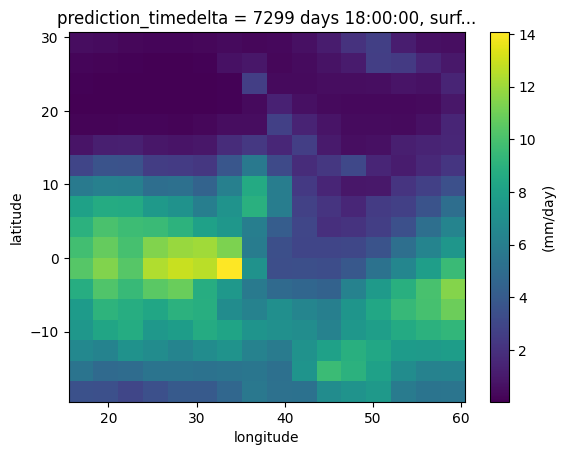

In [ ]:
# Calculate mean precipitation
m_to_mm = 1000
measurement_freq = 3  # in hours
measurements_in_a_day = 24 / measurement_freq
daily_precip = selected_data.precipitation_cumulative_mean.isel(
    time=-10, surface=0, prediction_timedelta=-5
) * (
    m_to_mm
    * measurements_in_a_day
    / (len(selected_data.prediction_timedelta) - 1)
)
daily_precip.plot(x="longitude", cbar_kwargs={"label": "(mm/day)"})

Figure saved as beautiful_precipitation.pdf


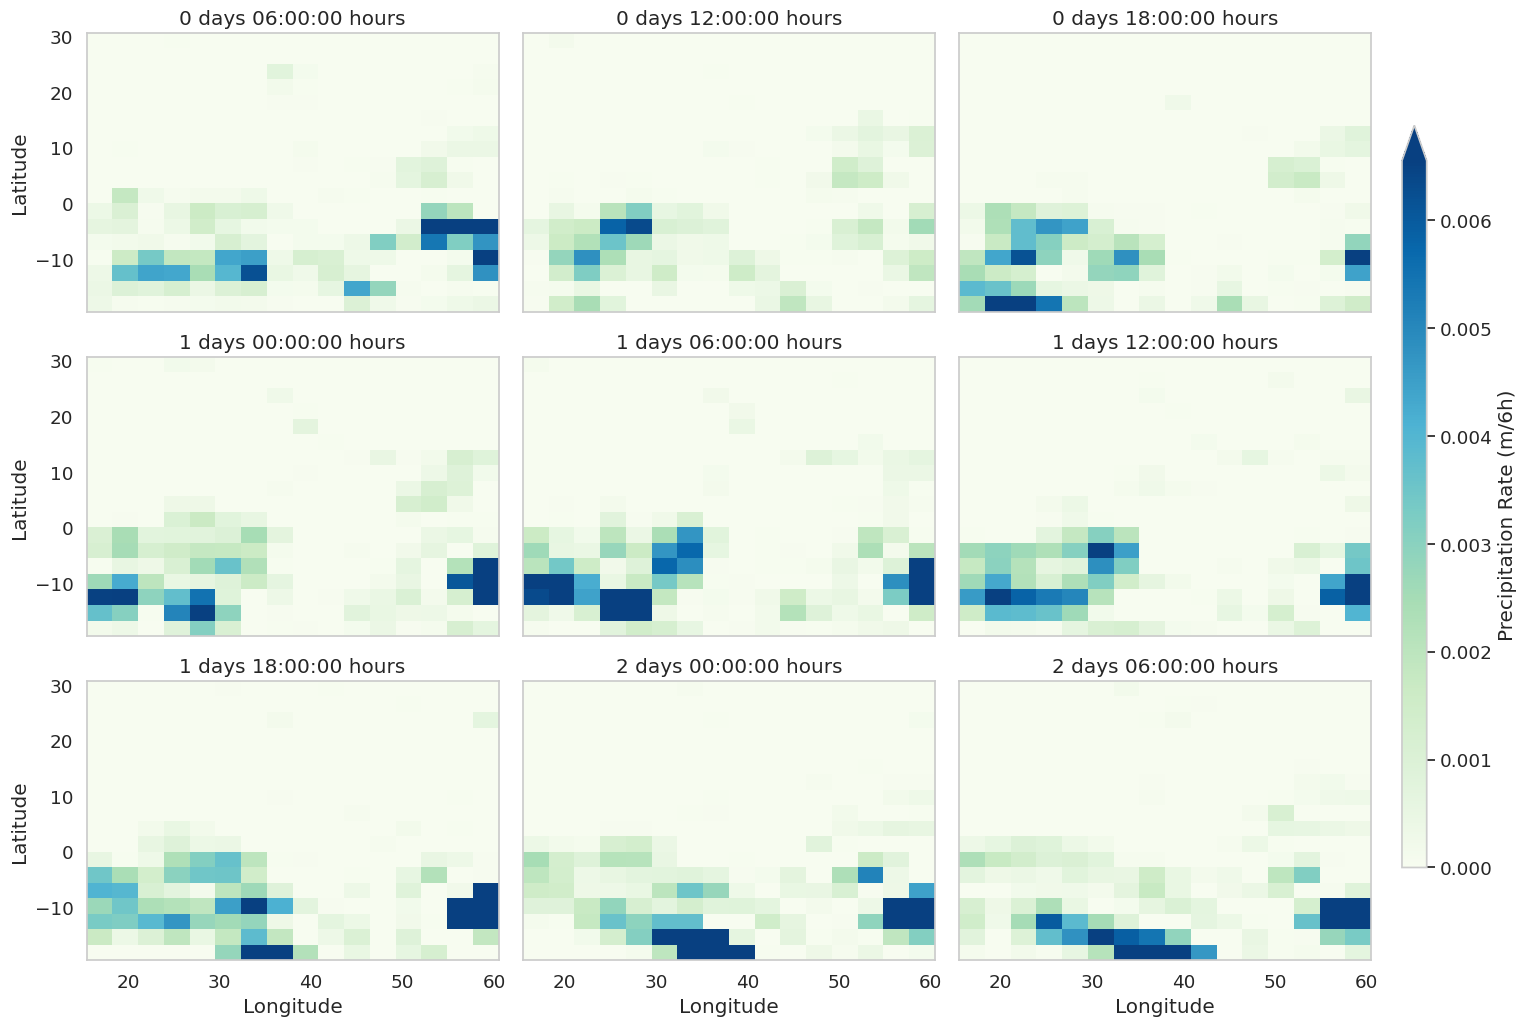

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  # Optional: makes the background and grid look modern

# --- 1. Setup for "Beautiful" and "Legible" Style ---
# This sets a white background with gridlines and increases font size by 20%
sns.set_theme(style="whitegrid", font_scale=1.2)

# --- 2. Prepare the Data ---
# Calculate the diff (rate) as you requested
plot_data = selected_data.precipitation_cumulative_mean.isel(
    time=0, surface=0, prediction_timedelta=slice(0, 10)
).diff('prediction_timedelta')

# --- 3. Create the Plot ---
p = plot_data.plot(
    x='longitude',
    col='prediction_timedelta',
    col_wrap=3,              # Creates a grid (3 columns) instead of a long line
    aspect=1.5,              # Makes maps wider (good for lat/lon)
    size=3.5,                # Increases the physical size of each subplot
    cmap='GnBu',             # 'GnBu' (Green-Blue) is cleaner for rain than default viridis
    robust=True,             # Optimizes color contrast (ignores extreme outliers)
    cbar_kwargs={
        'label': 'Precipitation Rate (m/6h)',
        'shrink': 0.8,       # Makes the colorbar slightly smaller to fit nicer
        'aspect': 30,        # Makes the colorbar thinner/elegant
        'pad': 0.02          # Moves colorbar closer to the plot
    }
)

# --- 4. Clean up Titles and Labels ---
# Remove the main big title
p.fig.suptitle("")

# Clean the subplot titles.
# Instead of "prediction_timedelta = 6 hours", it will just say "T+6h" (or similar numeric)
# If you want NO titles on subplots at all, use: p.set_titles("")
p.set_titles("{value} hours")

# Ensure axis labels are clear
p.set_xlabels("Longitude")
p.set_ylabels("Latitude")

# --- 5. Save as PDF ---
# bbox_inches='tight' cuts off extra white space around the image
p.fig.savefig("beautiful_precipitation.pdf", format='pdf', bbox_inches='tight')

print("Figure saved as beautiful_precipitation.pdf")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- 1. Style Setup ---
sns.set_theme(style="white", font_scale=1.4) # Slightly larger font for legibility

# --- 2. Prepare the Data ---
# Calculate the rate
data_diff = selected_data.precipitation_cumulative_mean.isel(
    time=0, surface=0, prediction_timedelta=slice(0, 10)
).diff('prediction_timedelta')

# --- 3. Date Calculation Setup ---
# Define the base date requested
base_date = pd.Timestamp("2001-01-01")

# --- 4. Calculate Global Limits (Dask Fix) ---
print("Calculating color limits...")
# We use .compute() here to handle the Lazy/Dask error
v_min = data_diff.min().compute().item()
v_max = data_diff.quantile(0.99).compute().item()

# --- 5. Loop and Save Each Figure ---
# Convert coordinates to numpy array for easier iteration
timesteps = data_diff.prediction_timedelta.values

for i, delta in enumerate(timesteps):

    # Select the specific 2D map
    single_map = data_diff.isel(prediction_timedelta=i)

    # --- Calculate the specific Date ---
    # We add the timedelta (nanoseconds) to the base date
    current_date = base_date + pd.Timedelta(delta)
    # Format it nicely (e.g., "01 Jan 2001 06:00")
    date_label = current_date.strftime("%d %b %Y %H:%M")

    # Create figure
    fig, ax = plt.subplots(figsize=(10, 8))

    # Plot the map
    single_map.plot(
        ax=ax,
        x='longitude',
        cmap='GnBu',
        vmin=v_min,
        vmax=v_max,
        add_labels=True,
        cbar_kwargs={
            'label': 'Precipitation (m/6h)', # Clean legend label
            'pad': 0.02,
            'shrink': 0.8
        }
    )

    # --- Customization ---
    ax.set_title("") # Strict "No Title" rule
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

    # --- Add Date as an Annotation ---
    # This puts the date inside the plot (top-right), legible but not a title.
    ax.text(
        0.97, 0.97,           # X, Y coordinates (0 to 1 relative to axes)
        date_label,           # The text
        transform=ax.transAxes,
        ha='right', va='top', # Alignment
        fontsize=14,
        fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.9) # White box behind text
    )

    # --- Save ---
    filename = f"precipitation_{current_date.strftime('%Y%m%d_%H%M')}.pdf"
    plt.savefig(filename, format='pdf', bbox_inches='tight')
    print(f"Saved: {filename}")

    plt.close(fig)

print("Processing complete.")

Calculating color limits...
Saved: precipitation_20010101_0600.pdf
Saved: precipitation_20010101_1200.pdf
Saved: precipitation_20010101_1800.pdf
Saved: precipitation_20010102_0000.pdf
Saved: precipitation_20010102_0600.pdf
Saved: precipitation_20010102_1200.pdf
Saved: precipitation_20010102_1800.pdf
Saved: precipitation_20010103_0000.pdf
Saved: precipitation_20010103_0600.pdf
Processing complete.


# **Times series and correlation**

In [ ]:
selected_data.evaporation.prediction_timedelta

<xarray.DataArray 'prediction_timedelta' (prediction_timedelta: 29204)> Size: 234kB
array([                 0,     21600000000000,     43200000000000, ...,
       630741600000000000, 630763200000000000, 630784800000000000],
      dtype='timedelta64[ns]')
Coordinates:
  * prediction_timedelta  (prediction_timedelta) timedelta64[ns] 234kB 00:00:...

In [ ]:
selected_data

<xarray.Dataset> Size: 29GB
Dimensions:                              (time: 37,
                                          prediction_timedelta: 29204,
                                          surface: 1, longitude: 16,
                                          latitude: 18, level: 3)
Coordinates:
  * time                                 (time) datetime64[ns] 296B 2001-01-0...
  * prediction_timedelta                 (prediction_timedelta) timedelta64[ns] 234kB ...
  * surface                              (surface) int64 8B 1
  * longitude                            (longitude) float64 128B 16.88 ... 5...
  * latitude                             (latitude) float64 144B -18.14 ... 29.3
  * level                                (level) int64 24B 500 700 850
Data variables:
    evaporation                          (time, prediction_timedelta, surface, longitude, latitude) float32 1GB dask.array<chunksize=(37, 8, 1, 16, 18), meta=np.ndarray>
    geopotential                         (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(37, 8, 3, 16, 18), meta=np.ndarray>
    precipitation_cumulative_mean        (time, prediction_timedelta, surface, longitude, latitude) float32 1GB dask.array<chunksize=(37, 8, 1, 16, 18), meta=np.ndarray>
    specific_cloud_ice_water_content     (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(37, 8, 3, 16, 18), meta=np.ndarray>
    specific_cloud_liquid_water_content  (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(37, 8, 3, 16, 18), meta=np.ndarray>
    specific_humidity                    (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(37, 8, 3, 16, 18), meta=np.ndarray>
    temperature                          (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(37, 8, 3, 16, 18), meta=np.ndarray>
    u_component_of_wind                  (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(37, 8, 3, 16, 18), meta=np.ndarray>
    v_component_of_wind                  (time, prediction_timedelta, level, longitude, latitude) float32 4GB dask.array<chunksize=(37, 8, 3, 16, 18), meta=np.ndarray>
Attributes:
    experiment_id:  121052169
    worker_id:      2

In [ ]:
ds_annual=selected_data.resample(time='1Y').mean(dim='time',skipna=True)

/usr/local/lib/python3.11/dist-packages/xarray/groupers.py:530: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


In [ ]:
print(ds_annual)

<xarray.Dataset> Size: 774MB
Dimensions:                              (time: 1, prediction_timedelta: 29204,
                                          surface: 1, longitude: 16,
                                          latitude: 18, level: 3)
Coordinates:
  * time                                 (time) datetime64[ns] 8B 2001-12-31
  * prediction_timedelta                 (prediction_timedelta) timedelta64[ns] 234kB ...
  * surface                              (surface) int64 8B 1
  * longitude                            (longitude) float64 128B 16.88 ... 5...
  * latitude                             (latitude) float64 144B -18.14 ... 29.3
  * level                                (level) int64 24B 500 700 850
Data variables:
    evaporation                          (time, prediction_timedelta, surface, longitude, latitude) float32 34MB dask.array<chunksize=(1, 8, 1, 16, 18), meta=np.ndarray>
    geopotential                         (time, prediction_timedelta, level, longitude, latitud

In [ ]:
ds_annual.evaporation

<xarray.DataArray 'evaporation' (time: 1, prediction_timedelta: 29204,
                                 surface: 1, longitude: 16, latitude: 18)> Size: 34MB
dask.array<getitem, shape=(1, 29204, 1, 16, 18), dtype=float32, chunksize=(1, 8, 1, 16, 18), chunktype=numpy.ndarray>
Coordinates:
  * time                  (time) datetime64[ns] 8B 2001-12-31
  * prediction_timedelta  (prediction_timedelta) timedelta64[ns] 234kB 00:00:...
  * surface               (surface) int64 8B 1
  * longitude             (longitude) float64 128B 16.88 19.69 ... 56.25 59.06
  * latitude              (latitude) float64 144B -18.14 -15.35 ... 26.51 29.3

In [ ]:
annual_temperature=ds_annual.temperature


In [ ]:
len(annual_temperature['prediction_timedelta'])

29204

In [ ]:
annual_temperature.prediction_timedelta.values

array([                 0,     21600000000000,     43200000000000, ...,
       630741600000000000, 630763200000000000, 630784800000000000],
      dtype='timedelta64[ns]')

Calculating spatial mean for all levels...
Figure saved as temperature_all_levels.pdf


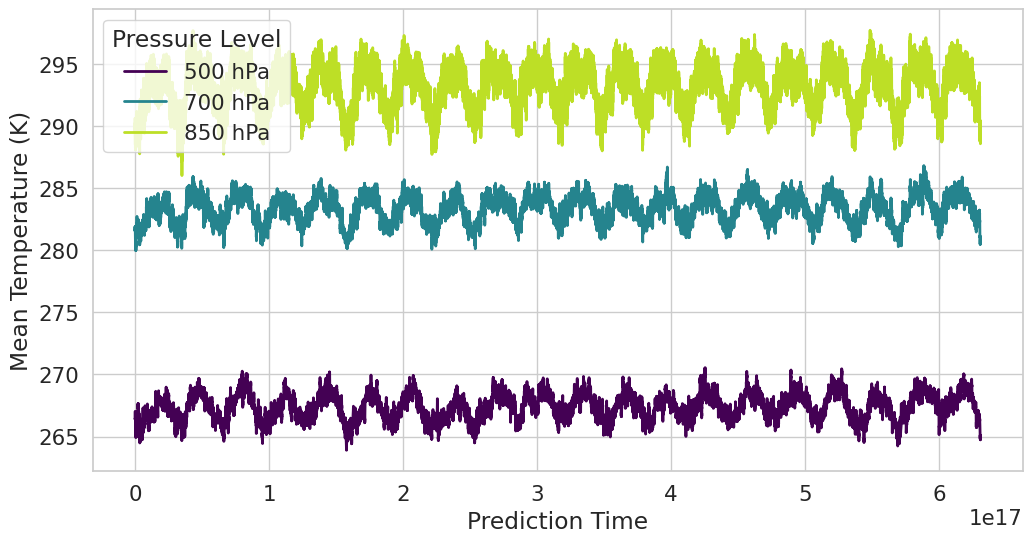

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import dask
import numpy as np

# --- 1. Style Setup ---
sns.set_theme(style="whitegrid", font_scale=1.4)

# --- 2. Prepare Data ---
# A. Chunk for parallel processing
if not selected_data.chunks:
    ds = selected_data.chunk({'prediction_timedelta': -1, 'latitude': 'auto', 'longitude': 'auto'})
else:
    ds = selected_data

# B. Select Variable and Remove Reference Time
# We keep the 'level' dimension!
# Shape becomes: (prediction_timedelta, level, lat, lon)
temp_data = ds['temperature'].isel(time=0)

# C. Calculate Spatial Mean
print("Calculating spatial mean for all levels...")
# We average over Lat/Lon, but PRESERVE 'level' and 'prediction_timedelta'
# Result shape: (prediction_timedelta, level)
ts_data = temp_data.mean(dim=['latitude', 'longitude']).compute()

# --- 3. Create the Plot ---
fig, ax = plt.subplots(figsize=(12, 6))

# Define a colormap to distinguish levels (e.g., Viridis, Coolwarm, or simple list)
# Getting unique levels to iterate
levels = ts_data.level.values
colors = plt.cm.viridis(np.linspace(0, 0.9, len(levels))) # Generate distinct colors

# D. Loop through each level and plot a line
for i, lvl in enumerate(levels):
    # Select the specific level data
    level_data = ts_data.sel(level=lvl)

    ax.plot(
        level_data.prediction_timedelta,
        level_data.values,
        color=colors[i],
        linewidth=2,
        label=f'{int(lvl)} hPa' # Label with pressure value
    )

# --- 4. Customization ---
ax.set_title("") # Strictly no title
ax.set_xlabel("Prediction Time")
ax.set_ylabel("Mean Temperature (K)")

# Add a nice legend
ax.legend(title="Pressure Level", loc='best', frameon=True)

# --- 5. Save as PDF ---
plt.savefig("temperature_all_levels.pdf", format='pdf', bbox_inches='tight')

print("Figure saved as temperature_all_levels.pdf")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import dask

# --- 1. Style Setup ---
sns.set_theme(style="whitegrid", font_scale=1.4)

# --- 2. Parallelization & Calculation ---
print("Preparing precipitation data...")

# Ensure data is chunked for parallel processing (Dask)
if not selected_data.chunks:
    selected_data = selected_data.chunk({'prediction_timedelta': -1, 'latitude': 'auto', 'longitude': 'auto'})

# STEP A: Differentiate (.diff)
# This converts "Total Accumulated Rain" -> "Rain per time step"
# We assume the time dimension is 'prediction_timedelta'
precip_rate = selected_data.precipitation_cumulative_mean.diff('prediction_timedelta')

# STEP B: Spatial Mean
# We calculate the average rainfall over the whole map for each time step
# .compute() triggers the parallel calculation
print("Calculating spatial mean (this may take a moment)...")
ts_precip = precip_rate.mean(dim=['latitude', 'longitude']).compute()

# --- 3. Create the Plot ---
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the incremental values (The Rain Rate)
ax.plot(
    ts_precip.prediction_timedelta,
    ts_precip.values,
    color='#1f77b4',   # Professional Blue
    linewidth=2.5,
    marker='o',        # Dots help show specific data points
    markersize=4,
    label='Precipitation Rate'
)

# --- 4. Customization (Strictly No Title) ---
ax.set_title("")

# Axis Labels
ax.set_xlabel("Prediction Time")
# Adjust the label unit based on your data (e.g., mm/day or m/6h)
ax.set_ylabel("Mean Precipitation (m/step)")

# Optional: Add a horizontal line at 0 to make it look grounded
ax.axhline(0, color='black', linewidth=0.8, alpha=0.5)

# --- 5. Save as PDF ---
plt.savefig("precipitation_timeseries.pdf", format='pdf', bbox_inches='tight')

print("Figure saved as precipitation_timeseries.pdf")
plt.show()

Preparing precipitation data...
Calculating spatial mean (this may take a moment)...


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import dask
import numpy as np

# --- 1. Style Setup ---
sns.set_theme(style="whitegrid", font_scale=1.4)

# --- 2. Prepare Data & Parallel Calculation ---
# A. Chunk data for Dask (if not already done)
if not selected_data.chunks:
    ds = selected_data.chunk({'prediction_timedelta': -1, 'latitude': 'auto', 'longitude': 'auto'})
else:
    ds = selected_data

# B. Select 'temperature' and remove the generic 'time' dimension
# Shape is now: (prediction_timedelta, level, lat, lon)
temp_data = ds['temperature'].isel(time=0)

# C. Calculate Spatial Mean
print("Calculating spatial mean for all levels (Parallel)...")
# We average over Lat/Lon, but we KEEP 'level' and 'prediction_timedelta'
# .compute() brings this small summarized table into memory so plotting is fast.
ts_data = temp_data.mean(dim=['latitude', 'longitude']).compute()

# --- 3. Loop and Save Each Level Separately ---
# Get the list of levels (e.g., 500, 850, 1000)
levels = ts_data.level.values

for lvl in levels:
    # Convert level to integer for clean filenames (e.g., 500 instead of 500.0)
    lvl_int = int(lvl)

    print(f"Processing Level: {lvl_int} hPa...")

    # Select the single line for this specific level
    # Shape becomes: (prediction_timedelta,) -> 1D Array
    data_subset = ts_data.sel(level=lvl)

    # Create Figure
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot
    ax.plot(
        data_subset.prediction_timedelta,
        data_subset.values,
        color='#d62728',   # Professional Red
        linewidth=2.5,
        label=f'{lvl_int} hPa Mean Temp'
    )

    # --- Customization ---
    ax.set_title("")  # STRICTLY NO TITLE

    ax.set_xlabel("Prediction Time")
    # We put the level information in the Y-axis label since there is no title
    ax.set_ylabel(f"Mean Temperature (K) @ {lvl_int} hPa")

    # Optional: Add grid
    ax.grid(True, linestyle='--', alpha=0.7)

    # --- Save ---
    filename = f"temperature_level_{lvl_int}.pdf"
    plt.savefig(filename, format='pdf', bbox_inches='tight')
    print(f"Saved: {filename}")

    # Close figure to free memory
    plt.close(fig)

print("All levels processed successfully.")

Calculating spatial mean for all levels (Parallel)...
Processing Level: 500 hPa...
Saved: temperature_level_500.pdf
Processing Level: 700 hPa...
Saved: temperature_level_700.pdf
Processing Level: 850 hPa...
Saved: temperature_level_850.pdf
All levels processed successfully.


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
import pandas as pd
import numpy as np

# --- 1. Setup Style ---
sns.set_theme(style="ticks", font_scale=1.2) # "ticks" is very clean for scientific pubs

# --- 2. Data Engineering & Flattening ---
print("Preparing data extraction...")

# We need to align the data because Precip needs .diff() (removing 1st step)
# and 3D variables (Temp, Wind) need a specific level selection.

# A. Handle Precipitation (The Rate)
# Remove the first NaN created by diff
precip = selected_data['precipitation_cumulative_mean'].isel(surface=0).diff('prediction_timedelta')

# B. Prepare other variables (Aligning dimensions)
# We select Level=0 for 3D vars. You can change this to level=1 or 2.
vars_to_extract = {
    'Temperature': selected_data['temperature'].isel(level=0),
    'Humidity': selected_data['specific_humidity'].isel(level=0),
    'U Wind': selected_data['u_component_of_wind'].isel(level=0),
    'V Wind': selected_data['v_component_of_wind'].isel(level=0),
    'Evaporation': selected_data['evaporation'].isel(surface=0)
}

# C. Slice others to match Precip's time (drop first prediction step)
cleaned_vars = {}
for name, da in vars_to_extract.items():
    # Assume prediction_timedelta is the dimension to slice
    cleaned_vars[name] = da.isel(prediction_timedelta=slice(1, None))

# Add precipitation to the dict
cleaned_vars['Precipitation'] = precip

# D. Merge into a temporary Dataset
ds_flat = xr.Dataset(cleaned_vars)

# --- 3. Sampling Strategy (Crucial for Performance) ---
# We cannot plot 600 Million points. We take a representative sample.
# We stride: Every 10th time, every 50th prediction step, every 4th lat/lon
print("Subsampling data for plotting (preserving distribution)...")
ds_sampled = ds_flat.isel(
    time=slice(0, None, 5),             # Take 1 out of every 5 forecasts
    prediction_timedelta=slice(0, None, 100), # Take 1 out of every 100 hours
    latitude=slice(0, None, 2),
    longitude=slice(0, None, 2)
)

# Load into Pandas for plotting
df = ds_sampled.to_dataframe().dropna().reset_index(drop=True)
print(f"Data ready. Analyze {len(df)} points.")

# ========================================================
# PART A: THE PAIRPLOT (Correlation Matrix)
# ========================================================
print("Generating Pairplot...")

g = sns.pairplot(
    df,
    diag_kind="kde",       # Smooth density on diagonal
    corner=True,           # Hide upper triangle (redundant)
    plot_kws={'alpha': 0.3, 's': 5, 'edgecolor': None, 'color': '#2b8cbe'}, # Scatter style
    diag_kws={'fill': True, 'color': '#2b8cbe'} # Histogram style
)

# Remove Titles
g.fig.suptitle("")

# Save
g.savefig("statistical_pairplot.pdf", format='pdf', bbox_inches='tight')
print("Saved: statistical_pairplot.pdf")
plt.close()

# ========================================================
# PART B: INDIVIDUAL PLOTS (Distributions)
# ========================================================
print("Generating individual distribution plots...")

for col in df.columns:
    fig, ax = plt.subplots(figsize=(8, 6))

    # Histogram with Kernel Density Estimate (KDE)
    sns.histplot(
        data=df,
        x=col,
        kde=True,
        color="#34495e",
        edgecolor="white",
        linewidth=0.5,
        line_kws={'linewidth': 2} # Thicker KDE line
    )

    # Clean Layout
    ax.set_title("")
    ax.set_xlabel(col, fontsize=14, fontweight='bold')
    ax.set_ylabel("Frequency", fontsize=14)

    # Despine (remove top and right borders for a pro look)
    sns.despine()

    # Save
    safe_name = col.replace(" ", "_").lower()
    plt.savefig(f"dist_{safe_name}.pdf", format='pdf', bbox_inches='tight')
    print(f"Saved: dist_{safe_name}.pdf")
    plt.close(fig)

# ========================================================
# PART C: STATISTICAL & SKEWNESS ANALYSIS
# ========================================================
print("\n" + "="*40)
print("STATISTICAL ANALYSIS REPORT")
print("="*40)

# 1. Basic Statistics (Mean, Std, Min, Max, Quartiles)
stats_desc = df.describe().T
stats_desc['median'] = df.median() # Add median explicitly

# 2. Skewness (Asymmetry)
# 0 = Normal dist, >0 = Right tail (Positive), <0 = Left tail (Negative)
skewness = df.skew()
stats_desc['skewness'] = skewness

# 3. Kurtosis (Tail heaviness)
# 3 = Normal, >3 = Heavy tails (Outliers), <3 = Light tails
kurtosis = df.kurtosis()
stats_desc['kurtosis'] = kurtosis

# Reorder columns for readability
final_stats = stats_desc[['mean', 'std', 'min', 'median', 'max', 'skewness', 'kurtosis']]

# Print to console
print(final_stats)

# Save to CSV for your paper/report
final_stats.to_csv("statistical_analysis_results.csv")
print("\nAnalysis saved to 'statistical_analysis_results.csv'")

# Interpretation Helper
print("\n--- SKEWNESS INTERPRETATION ---")
for var, val in skewness.items():
    if val > 1:
        interp = "Highly Positively Skewed (Long tail to right)"
    elif val < -1:
        interp = "Highly Negatively Skewed (Long tail to left)"
    elif 0.5 < val <= 1:
        interp = "Moderately Positively Skewed"
    elif -1 <= val < -0.5:
        interp = "Moderately Negatively Skewed"
    else:
        interp = "Approximately Symmetric (Normal-ish)"
    print(f"{var}: {val:.3f} -> {interp}")

Preparing data extraction...
Subsampling data for plotting (preserving distribution)...
Data ready. Analyze 168768 points.
Generating Pairplot...
Saved: statistical_pairplot.pdf
Generating individual distribution plots...
Saved: dist_level.pdf
Saved: dist_temperature.pdf
Saved: dist_humidity.pdf
Saved: dist_u_wind.pdf
Saved: dist_v_wind.pdf
Saved: dist_surface.pdf
Saved: dist_evaporation.pdf
Saved: dist_precipitation.pdf

STATISTICAL ANALYSIS REPORT
                     mean       std         min      median         max  \
level          500.000000  0.000000  500.000000  500.000000  500.000000   
Temperature    267.469635  2.446470  247.249329  267.816132  278.164673   
Humidity         0.001520  0.001348   -0.001744    0.001177    0.006707   
U Wind           1.173483  8.498558  -28.247520   -0.344670   51.524052   
V Wind          -0.325007  4.448430  -31.116314   -0.414244   34.016880   
surface          1.000000  0.000000    1.000000    1.000000    1.000000   
Evaporation     -0.00

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
import pandas as pd
import numpy as np

# --- 1. Setup Style ---
sns.set_theme(style="ticks", font_scale=1.2) # "ticks" is very clean for scientific pubs

# --- 2. Data Engineering & Flattening ---
print("Preparing data extraction...")

# We need to align the data because Precip needs .diff() (removing 1st step)
# and 3D variables (Temp, Wind) need a specific level selection.

# A. Handle Precipitation (The Rate)
# Remove the first NaN created by diff
precip = selected_data['precipitation_cumulative_mean'].isel(surface=0).diff('prediction_timedelta')

# B. Prepare other variables (Aligning dimensions)
# We select Level=0 for 3D vars. You can change this to level=1 or 2.
vars_to_extract = {
    'Temperature': selected_data['temperature'].isel(level=1),
    'Humidity': selected_data['specific_humidity'].isel(level=1),
    'U Wind': selected_data['u_component_of_wind'].isel(level=1),
    'V Wind': selected_data['v_component_of_wind'].isel(level=1),
    'Evaporation': selected_data['evaporation'].isel(surface=1)
}

# C. Slice others to match Precip's time (drop first prediction step)
cleaned_vars = {}
for name, da in vars_to_extract.items():
    # Assume prediction_timedelta is the dimension to slice
    cleaned_vars[name] = da.isel(prediction_timedelta=slice(1, None))

# Add precipitation to the dict
cleaned_vars['Precipitation'] = precip

# D. Merge into a temporary Dataset
ds_flat = xr.Dataset(cleaned_vars)

# --- 3. Sampling Strategy (Crucial for Performance) ---
# We cannot plot 600 Million points. We take a representative sample.
# We stride: Every 10th time, every 50th prediction step, every 4th lat/lon
print("Subsampling data for plotting (preserving distribution)...")
ds_sampled = ds_flat.isel(
    time=slice(0, None, 5),             # Take 1 out of every 5 forecasts
    prediction_timedelta=slice(0, None, 100), # Take 1 out of every 100 hours
    latitude=slice(0, None, 2),
    longitude=slice(0, None, 2)
)

# Load into Pandas for plotting
df = ds_sampled.to_dataframe().dropna().reset_index(drop=True)
print(f"Data ready. Analyze {len(df)} points.")

# ========================================================
# PART A: THE PAIRPLOT (Correlation Matrix)
# ========================================================
print("Generating Pairplot...")

g = sns.pairplot(
    df,
    diag_kind="kde",       # Smooth density on diagonal
    corner=True,           # Hide upper triangle (redundant)
    plot_kws={'alpha': 0.3, 's': 5, 'edgecolor': None, 'color': '#2b8cbe'}, # Scatter style
    diag_kws={'fill': True, 'color': '#2b8cbe'} # Histogram style
)

# Remove Titles
g.fig.suptitle("")

# Save
g.savefig("statistical_pairplot.pdf", format='pdf', bbox_inches='tight')
print("Saved: statistical_pairplot.pdf")
plt.close()

# ========================================================
# PART B: INDIVIDUAL PLOTS (Distributions)
# ========================================================
print("Generating individual distribution plots...")

for col in df.columns:
    fig, ax = plt.subplots(figsize=(8, 6))

    # Histogram with Kernel Density Estimate (KDE)
    sns.histplot(
        data=df,
        x=col,
        kde=True,
        color="#34495e",
        edgecolor="white",
        linewidth=0.5,
        line_kws={'linewidth': 2} # Thicker KDE line
    )

    # Clean Layout
    ax.set_title("")
    ax.set_xlabel(col, fontsize=14, fontweight='bold')
    ax.set_ylabel("Frequency", fontsize=14)

    # Despine (remove top and right borders for a pro look)
    sns.despine()

    # Save
    safe_name = col.replace(" ", "_").lower()
    plt.savefig(f"dist_{safe_name}.pdf", format='pdf', bbox_inches='tight')
    print(f"Saved: dist_{safe_name}.pdf")
    plt.close(fig)

# ========================================================
# PART C: STATISTICAL & SKEWNESS ANALYSIS
# ========================================================
print("\n" + "="*40)
print("STATISTICAL ANALYSIS REPORT")
print("="*40)

# 1. Basic Statistics (Mean, Std, Min, Max, Quartiles)
stats_desc = df.describe().T
stats_desc['median'] = df.median() # Add median explicitly

# 2. Skewness (Asymmetry)
# 0 = Normal dist, >0 = Right tail (Positive), <0 = Left tail (Negative)
skewness = df.skew()
stats_desc['skewness'] = skewness

# 3. Kurtosis (Tail heaviness)
# 3 = Normal, >3 = Heavy tails (Outliers), <3 = Light tails
kurtosis = df.kurtosis()
stats_desc['kurtosis'] = kurtosis

# Reorder columns for readability
final_stats = stats_desc[['mean', 'std', 'min', 'median', 'max', 'skewness', 'kurtosis']]

# Print to console
print(final_stats)

# Save to CSV for your paper/report
final_stats.to_csv("statistical_analysis_results.csv")
print("\nAnalysis saved to 'statistical_analysis_results.csv'")

# Interpretation Helper
print("\n--- SKEWNESS INTERPRETATION ---")
for var, val in skewness.items():
    if val > 1:
        interp = "Highly Positively Skewed (Long tail to right)"
    elif val < -1:
        interp = "Highly Negatively Skewed (Long tail to left)"
    elif 0.5 < val <= 1:
        interp = "Moderately Positively Skewed"
    elif -1 <= val < -0.5:
        interp = "Moderately Negatively Skewed"
    else:
        interp = "Approximately Symmetric (Normal-ish)"
    print(f"{var}: {val:.3f} -> {interp}")

Preparing data extraction...


IndexError: Index 1 is out of bounds for axis 2 with size 1

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
import pandas as pd
import numpy as np

# --- 1. Setup Style ---
sns.set_theme(style="ticks", font_scale=1.2) # "ticks" is very clean for scientific pubs

# --- 2. Data Engineering & Flattening ---
print("Preparing data extraction...")

# We need to align the data because Precip needs .diff() (removing 1st step)
# and 3D variables (Temp, Wind) need a specific level selection.

# A. Handle Precipitation (The Rate)
# Remove the first NaN created by diff
precip = selected_data['precipitation_cumulative_mean'].isel(surface=0).diff('prediction_timedelta')

# B. Prepare other variables (Aligning dimensions)
# We select Level=0 for 3D vars. You can change this to level=1 or 2.
vars_to_extract = {
    'Temperature': selected_data['temperature'].isel(level=2),
    'Humidity': selected_data['specific_humidity'].isel(level=2),
    'U Wind': selected_data['u_component_of_wind'].isel(level=2),
    'V Wind': selected_data['v_component_of_wind'].isel(level=2),
    'Evaporation': selected_data['evaporation'].isel(surface=2)
}

# C. Slice others to match Precip's time (drop first prediction step)
cleaned_vars = {}
for name, da in vars_to_extract.items():
    # Assume prediction_timedelta is the dimension to slice
    cleaned_vars[name] = da.isel(prediction_timedelta=slice(1, None))

# Add precipitation to the dict
cleaned_vars['Precipitation'] = precip

# D. Merge into a temporary Dataset
ds_flat = xr.Dataset(cleaned_vars)

# --- 3. Sampling Strategy (Crucial for Performance) ---
# We cannot plot 600 Million points. We take a representative sample.
# We stride: Every 10th time, every 50th prediction step, every 4th lat/lon
print("Subsampling data for plotting (preserving distribution)...")
ds_sampled = ds_flat.isel(
    time=slice(0, None, 5),             # Take 1 out of every 5 forecasts
    prediction_timedelta=slice(0, None, 100), # Take 1 out of every 100 hours
    latitude=slice(0, None, 2),
    longitude=slice(0, None, 2)
)

# Load into Pandas for plotting
df = ds_sampled.to_dataframe().dropna().reset_index(drop=True)
print(f"Data ready. Analyze {len(df)} points.")

# ========================================================
# PART A: THE PAIRPLOT (Correlation Matrix)
# ========================================================
print("Generating Pairplot...")

g = sns.pairplot(
    df,
    diag_kind="kde",       # Smooth density on diagonal
    corner=True,           # Hide upper triangle (redundant)
    plot_kws={'alpha': 0.3, 's': 5, 'edgecolor': None, 'color': '#2b8cbe'}, # Scatter style
    diag_kws={'fill': True, 'color': '#2b8cbe'} # Histogram style
)

# Remove Titles
g.fig.suptitle("")

# Save
g.savefig("statistical_pairplot.pdf", format='pdf', bbox_inches='tight')
print("Saved: statistical_pairplot.pdf")
plt.close()

# ========================================================
# PART B: INDIVIDUAL PLOTS (Distributions)
# ========================================================
print("Generating individual distribution plots...")

for col in df.columns:
    fig, ax = plt.subplots(figsize=(8, 6))

    # Histogram with Kernel Density Estimate (KDE)
    sns.histplot(
        data=df,
        x=col,
        kde=True,
        color="#34495e",
        edgecolor="white",
        linewidth=0.5,
        line_kws={'linewidth': 2} # Thicker KDE line
    )

    # Clean Layout
    ax.set_title("")
    ax.set_xlabel(col, fontsize=14, fontweight='bold')
    ax.set_ylabel("Frequency", fontsize=14)

    # Despine (remove top and right borders for a pro look)
    sns.despine()

    # Save
    safe_name = col.replace(" ", "_").lower()
    plt.savefig(f"dist_{safe_name}.pdf", format='pdf', bbox_inches='tight')
    print(f"Saved: dist_{safe_name}.pdf")
    plt.close(fig)

# ========================================================
# PART C: STATISTICAL & SKEWNESS ANALYSIS
# ========================================================
print("\n" + "="*40)
print("STATISTICAL ANALYSIS REPORT")
print("="*40)

# 1. Basic Statistics (Mean, Std, Min, Max, Quartiles)
stats_desc = df.describe().T
stats_desc['median'] = df.median() # Add median explicitly

# 2. Skewness (Asymmetry)
# 0 = Normal dist, >0 = Right tail (Positive), <0 = Left tail (Negative)
skewness = df.skew()
stats_desc['skewness'] = skewness

# 3. Kurtosis (Tail heaviness)
# 3 = Normal, >3 = Heavy tails (Outliers), <3 = Light tails
kurtosis = df.kurtosis()
stats_desc['kurtosis'] = kurtosis

# Reorder columns for readability
final_stats = stats_desc[['mean', 'std', 'min', 'median', 'max', 'skewness', 'kurtosis']]

# Print to console
print(final_stats)

# Save to CSV for your paper/report
final_stats.to_csv("statistical_analysis_results.csv")
print("\nAnalysis saved to 'statistical_analysis_results.csv'")

# Interpretation Helper
print("\n--- SKEWNESS INTERPRETATION ---")
for var, val in skewness.items():
    if val > 1:
        interp = "Highly Positively Skewed (Long tail to right)"
    elif val < -1:
        interp = "Highly Negatively Skewed (Long tail to left)"
    elif 0.5 < val <= 1:
        interp = "Moderately Positively Skewed"
    elif -1 <= val < -0.5:
        interp = "Moderately Negatively Skewed"
    else:
        interp = "Approximately Symmetric (Normal-ish)"
    print(f"{var}: {val:.3f} -> {interp}")